In [121]:
# Python
import pandas as pd

#
from pathlib import Path
from datetime import datetime
#

from sklearn.metrics import make_scorer, mean_absolute_error
#
import importlib
import utilities.train_test.train_test as train_test
import utilities.mpt_utils as mpt_utils
import utilities.plots as plots
import utilities.xgboost_utils as xgboost_utils

In [122]:
df = pd.read_csv('../../../data/df_monthly_prices_complete_euro.csv', index_col='Date')
df_pct = pd.read_csv('../../../data/df_monthly_returns_complete.csv', index_col='Date')
df_prices = pd.read_csv('../../../data/df_monthly_prices_complete.csv', index_col='Date')
df_overview = pd.read_csv('../../../data/df_overview.csv', index_col=0)

min_date = pd.to_datetime(df_pct.index.max()) - pd.DateOffset(months=12*15)
min_datestr = min_date.strftime('%Y-%m-%d')

In [123]:
importlib.reload(train_test)
 
file=Path("../../../data/df_tabular_multi.csv")

if file.exists():
    df_tabular_multi=pd.read_csv(file, index_col=0)
else:
    importlib.reload(train_test)
    df_tabular_multi = train_test.get_dataframe_tabular_multi(df_pct)
    df_tabular_multi.to_csv(file)

## Direct forecasting

In [124]:
# True values
y_true = df_pct.mean(axis=1)

## XGBoost Multivariate - 1 Month

In [125]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)
df_tab_multi_filtered = df_tabular_multi.tail(240*len(df.columns))
X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tab_multi_filtered, months=60)
#
model_1m, score_1m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:5.55300	validation_1-rmse:0.52397
[1]	validation_0-rmse:4.72250	validation_1-rmse:0.80497
[2]	validation_0-rmse:4.01506	validation_1-rmse:1.07163
[3]	validation_0-rmse:3.41355	validation_1-rmse:1.30157
[4]	validation_0-rmse:2.90387	validation_1-rmse:1.49990
[5]	validation_0-rmse:2.47159	validation_1-rmse:1.66921
[6]	validation_0-rmse:2.10229	validation_1-rmse:1.81779
[7]	validation_0-rmse:1.78839	validation_1-rmse:1.94142
[8]	validation_0-rmse:1.52195	validation_1-rmse:2.04640
[9]	validation_0-rmse:1.29568	validation_1-rmse:2.13580
[10]	validation_0-rmse:1.10452	validation_1-rmse:2.21192
[11]	validation_0-rmse:0.94165	validation_1-rmse:2.27662
[12]	validation_0-rmse:0.80434	validation_1-rmse:2.33172
[13]	validation_0-rmse:0.68835	validation_1-rmse:2.37855
[14]	validation_0-rmse:0.59035	validation_1-rmse:2.41841
[15]	validation_0-rmse:0.50678	validation_1-rmse:2.45224
[16]	validation_0-rmse:0.43785	validation_1-rmse:2.48103
[17]	validation_0-rmse:0.38017	validation

In [126]:
X_train

,month,year,m_return(t-11),m_return(t-10),m_return(t-9),m_return(t-8),m_return(t-7),m_return(t-6),m_return(t-5),m_return(t-4),...,industry_Traders & Distributors,industry_Transportation,industry_Transportation Infrastructure,industry_Utilities,stock_exchange_ETR,stock_exchange_LON,stock_exchange_NAS,stock_exchange_NYS,stock_exchange_TKS,trailing_pe_scaled
76076,11,2000,1.00,1.00,1.16,1.00,1.00,1.00,1.00,1.00,...,0,0,0,0,0,0,0,1,0,0.001861
76077,12,2000,1.00,1.16,1.00,1.00,1.00,1.00,1.00,1.00,...,0,0,0,0,0,0,0,1,0,0.001861
76078,1,2001,1.16,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0,0,0,0,0,0,0,1,0,0.001861
76079,2,2001,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0,0,0,0,0,0,0,1,0,0.001861
76080,3,2001,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0,0,0,0,0,0,0,1,0,0.001861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472693,4,2019,1.07,1.00,1.06,1.00,1.09,0.90,1.05,0.90,...,0,1,0,0,0,0,0,1,0,0.002044
472694,5,2019,1.00,1.06,1.00,1.09,0.90,1.05,0.90,1.15,...,0,1,0,0,0,0,0,1,0,0.002044
472695,6,2019,1.06,1.00,1.09,0.90,1.05,0.90,1.15,1.05,...,0,1,0,0,0,0,0,1,0,0.002044
472696,7,2019,1.00,1.09,0.90,1.05,0.90,1.15,1.05,1.00,...,0,1,0,0,0,0,0,1,0,0.002044


In [127]:
months_1m = 1
X_train_1m, y_train_1m, X_test_1m, y_test_1m, min_datestr_1m = train_test.split_train_test_tabular(df_tabular_multi, months=1)
# reset index
X_train_1m.reset_index(drop=True, inplace=True)
y_train_1m.reset_index(drop=True, inplace=True)
X_test_1m.reset_index(drop=True, inplace=True)
y_test_1m.reset_index(drop=True, inplace=True)

In [128]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 6 months
X_train_input_1m = X_train_1m.head(len(X_train_1m) - len(df_pct.columns) * months_1m)
# Get last 6 months of the training dataset and use as input to predict the next 6 months
X_test_input_1m = X_train_1m.tail(len(df_pct.columns) * months_1m)

# Trained 
y_train_pred_1m = model_1m.predict(X_train_input_1m)
# Predictions
y_test_pred_1m = model_1m.predict(X_test_input_1m)

### 1 month Actual vs Prediction

In [129]:
importlib.reload(mpt_utils)
importlib.reload(plots)

y_train_mean_pred_1m, y_test_mean_pred_1m = mpt_utils.get_train_test_mean_pred(y_train_pred_1m, y_test_pred_1m,
                                                                                len(df_pct.columns))
plots.generate_timeseries_plot(df_pct, df_tabular_multi, y_train_mean_pred_1m, y_test_mean_pred_1m)

#### Allocation - 1 Month

In order for Mean-Variance Optimisation to create an optimal portfolio, by allocation to the best performing tickers, 
based on their weight and price. Predicted return and those being evaluated have to be adopted to the actual prices.


In [130]:
importlib.reload(mpt_utils)

# Get train true values followed with predicted month/s
y_train_1m_list = y_train_1m['m_return_target(t+1)'].tolist()
y_test_1m_list = y_test_pred_1m.tolist()
#
df_to_evaluate_1m = mpt_utils.get_df_from_pred_list(df_pct, y_train_1m_list, y_test_1m_list)
df_to_evaluate_1m = df_to_evaluate_1m - 1
#
df_to_evaluate_1m.tail(3)

,RS1.L,KE,TEG.DE,LEG.DE,SCS,HNI,AVT,ACCO,VNA.DE,7912.T,...,DEQ.DE,KIDS,HALO,MATW,9842.T,KVHI,MOON.L,NEO,6055.T,UNP
283,0.190000,0.080000,0.020000,0.060000,0.120000,0.22000,0.050000,0.090000,0.070000,-0.080000,...,0.10000,0.07000,0.06000,0.160000,-0.060000,-0.040000,0.140000,0.280000,-0.100000,0.090000
284,-0.040000,-0.220000,0.060000,0.080000,-0.020000,-0.02000,0.030000,0.070000,0.100000,0.060000,...,-0.05000,0.04000,0.16000,-0.130000,-0.040000,0.000000,-0.030000,-0.070000,-0.110000,0.040000
285,0.022735,0.031849,0.038203,0.042481,0.018576,0.01324,0.031824,0.024014,0.007395,0.001942,...,-0.02029,-0.00868,0.00833,0.018864,0.027201,0.037062,0.035512,0.020886,0.027564,0.001306


In [131]:
importlib.reload(mpt_utils)

weights_1m, mu_1m, S_1m, weights_all_1m = mpt_utils.portfolio_and_plot(df_to_evaluate_1m, df)

Expected annual return: 34.9%
Annual volatility: 35.3%
Sharpe Ratio: 0.93
-- Allocation --
{'PLUS.L': 1, 'NVDA': 4, '7552.T': 13, '8129.T': 9, 'LRN': 5, '2760.T': 11, '7944.T': 11, 'SFM': 2, '6417.T': 16, '7451.T': 6, '9433.T': 6, '7433.T': 6, '9101.T': 5, '3191.T': 15, '9697.T': 10, 'PGR': 1, '7984.T': 11, 'BMI': 1, 'AGYS': 1, '8114.T': 5, '7974.T': 2, '7868.T': 46, '8022.T': 2, '1911.T': 3, 'PECO': 3, '3659.T': 7, '9107.T': 6, 'CPRX': 7, '2767.T': 7, '9413.T': 4, '3050.T': 11, '7734.T': 3, '6430.T': 3, '1973.T': 4, 'BIRK': 1, '8060.T': 2, 'FINV': 16, '2670.T': 3, '4980.T': 1, '8012.T': 2, '9434.T': 4, '6460.T': 4, '8283.T': 2, '4812.T': 1, '7906.T': 4, 'BBW': 1, '2733.T': 2, 'OMI': 3, '9882.T': 2, 'PMTS': 2, '8309.T': 1, '7994.T': 2, '8803.T': 1, '7599.T': 1}
-- Weights Percentage --
{'BMI': 0.0213, '7984.T': 0.0223, 'AGYS': 0.0204, 'NVDA': 0.0633, '7944.T': 0.0343, '7433.T': 0.0275, '2760.T': 0.0358, '7552.T': 0.0447, '6417.T': 0.029, 'LRN': 0.0406, '9101.T': 0.0262, '8129.T': 0.041

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview

#### Overview - 1 Month

In [132]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_1m, mu_1m, S_1m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
PLUS.L,1,-0.016038,32.15%,-32.76%,131.69%
NVDA,4,0.105849,17.77%,-3.33%,209.80%
7552.T,13,0.032642,13.09%,-17.65%,18.02%
8129.T,9,-0.028491,27.89%,-5.74%,-9.19%
LRN,5,-0.068113,31.16%,-8.93%,-0.92%
2760.T,11,0.056792,18.39%,9.08%,61.83%
7944.T,11,-0.321698,34.80%,-467.40%,876.44%
SFM,2,0.045660,30.31%,-28.03%,9.26%
6417.T,16,0.033962,35.14%,-8.82%,-23.01%
7451.T,6,0.016604,94.00%,-3.79%,4.61%


## 6 Months


In [133]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)

X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=60, target_key='m_return_target(t+6)')
#
model_6m, score_6m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:5.08552	validation_1-rmse:0.33372
[1]	validation_0-rmse:4.32331	validation_1-rmse:0.33382
[2]	validation_0-rmse:3.67551	validation_1-rmse:0.33357
[3]	validation_0-rmse:3.12503	validation_1-rmse:0.33364
[4]	validation_0-rmse:2.65714	validation_1-rmse:0.33393
[5]	validation_0-rmse:2.25967	validation_1-rmse:0.33401
[6]	validation_0-rmse:1.92203	validation_1-rmse:0.33409
[7]	validation_0-rmse:1.63525	validation_1-rmse:0.33416
[8]	validation_0-rmse:1.39175	validation_1-rmse:0.33419
[9]	validation_0-rmse:1.18560	validation_1-rmse:0.33443
[10]	validation_0-rmse:1.01045	validation_1-rmse:0.33489
[11]	validation_0-rmse:0.86236	validation_1-rmse:0.33494
[12]	validation_0-rmse:0.73620	validation_1-rmse:0.33505
[13]	validation_0-rmse:0.62987	validation_1-rmse:0.33558
[14]	validation_0-rmse:0.54044	validation_1-rmse:0.33587
[15]	validation_0-rmse:0.46523	validation_1-rmse:0.33588
[16]	validation_0-rmse:0.40183	validation_1-rmse:0.33604
[17]	validation_0-rmse:0.34918	validation

In [134]:
months_6m = 6
X_train_6m, y_train_6m, X_test_6m, y_test_6m, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=6,
                                                                                      target_key='m_return_target(t+6)')

In [135]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 6 months
X_train_input_6m = X_train_6m.head(len(X_train_6m) - len(df_pct.columns)*months_6m)
# Get last 6 months of the training dataset and use as input to predict the next 6 months
X_test_input_6m = X_train_6m.tail(len(df_pct.columns)*months_6m)

# Trained 
y_train_pred_6m = model_6m.predict(X_train_input_6m)
# Predictions
y_test_pred_6m = model_6m.predict(X_test_input_6m)

### 6 Months Actual vs Prediction

In [136]:
importlib.reload(mpt_utils)
y_train_mean_pred_6m, y_test_mean_pred_6m = mpt_utils.get_train_test_mean_pred(y_train_pred_6m, y_test_pred_6m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular_multi, y_train_mean_pred_6m, y_test_mean_pred_6m)

#### Allocation

In [137]:
# Get train true values followed with predicted month/s
y_train_6m_list = y_train_6m['m_return_target(t+6)'].tolist()
y_pred_6m_list = y_test_pred_6m.tolist()
#
df_to_evaluate_6m = mpt_utils.get_df_from_pred_list(df_pct, y_train_1m_list, y_pred_6m_list)
df_to_evaluate_6m = df_to_evaluate_6m - 1
df_to_evaluate_6m.head(3)

,RS1.L,KE,TEG.DE,LEG.DE,SCS,HNI,AVT,ACCO,VNA.DE,7912.T,...,DEQ.DE,KIDS,HALO,MATW,9842.T,KVHI,MOON.L,NEO,6055.T,UNP
0,0.00,0.00,0.00,-0.06,0.03,0.05,0.22,0.00,-0.04,0.05,...,0.00,0.00,0.00,0.09,0.00,-0.16,0.00,0.00,0.0,0.09
1,0.01,0.00,0.55,0.04,0.09,-0.02,0.28,-0.08,0.02,-0.06,...,0.00,0.29,-0.09,-0.02,-0.04,0.69,-0.14,-0.24,0.0,0.05
2,0.00,-0.03,0.09,-0.13,-0.05,-0.01,-0.11,-0.02,-0.10,-0.08,...,-0.48,0.00,0.00,0.01,0.00,-0.26,0.00,0.00,0.0,0.04


In order for Mean-Variance Optimisation to create an optimal portfolio, by allocation to the best performing tickers, 
based on their weight and price. Predicted return and those being evaluated have to be adopted to the actual prices.

In [ ]:
importlib.reload(mpt_utils)

weights_6m, mu_6m, S_6m, weights_all_6m = mpt_utils.portfolio_and_plot(df_to_evaluate_6m, df)

#### Overview - 6 Months

In [108]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_6m, mu_6m, S_6m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
8129.T,7,0.001000,19.77%,-5.74%,-9.19%
BAH,1,-0.005667,14.99%,44.58%,20.61%
7552.T,10,0.007167,9.39%,-17.65%,18.02%
PLUS.L,1,0.021333,25.12%,-32.76%,131.69%
7451.T,5,0.008167,22.48%,-3.79%,4.61%
...,...,...,...,...,...
9069.T,4,0.033833,12.75%,2.27%,20.42%
9869.T,1,0.032833,115.89%,2.71%,14.36%
FINV,5,0.044833,22.83%,-48.75%,-31.45%
6718.T,1,0.070167,20.71%,30.14%,-1.44%


## 12 Months

In [110]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)

X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=60,
                                                                                    target_key='m_return_target(t+12)')
#
model_12m, score_12m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:5.08601	validation_1-rmse:0.35089
[1]	validation_0-rmse:4.32426	validation_1-rmse:0.35300
[2]	validation_0-rmse:3.67695	validation_1-rmse:0.35651
[3]	validation_0-rmse:3.12704	validation_1-rmse:0.36044
[4]	validation_0-rmse:2.65983	validation_1-rmse:0.36404
[5]	validation_0-rmse:2.26301	validation_1-rmse:0.36516
[6]	validation_0-rmse:1.92607	validation_1-rmse:0.36541
[7]	validation_0-rmse:1.63996	validation_1-rmse:0.36921
[8]	validation_0-rmse:1.39589	validation_1-rmse:0.36923
[9]	validation_0-rmse:1.18973	validation_1-rmse:0.36863
[10]	validation_0-rmse:1.01514	validation_1-rmse:0.37069
[11]	validation_0-rmse:0.86764	validation_1-rmse:0.37146
[12]	validation_0-rmse:0.74329	validation_1-rmse:0.37212
[13]	validation_0-rmse:0.63770	validation_1-rmse:0.37132
[14]	validation_0-rmse:0.54854	validation_1-rmse:0.37134
[15]	validation_0-rmse:0.47228	validation_1-rmse:0.37109
[16]	validation_0-rmse:0.41009	validation_1-rmse:0.37130
[17]	validation_0-rmse:0.35736	validation

In [112]:
months_12m = 12
X_train_12m, y_train_12m, X_test_12m, y_test_12m, min_datestr = train_test.split_train_test_tabular(df_tabular_multi, months=months_12m,
                                                                                          target_key='m_return_target(t+12)')

In [113]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 12 months
X_train_input_12m = X_train_12m.head(len(X_train_12m) - len(df_pct.columns)*months_12m)
# Get last 6 months of the training dataset and use as input to predict the next 12 months
X_test_input_12m = X_train_12m.tail(len(df_pct.columns)*months_12m)

# Trained 
y_train_pred_12m = model_12m.predict(X_train_input_12m)
# Predictions
y_test_pred_12m = model_12m.predict(X_test_input_12m)

### 12 Months Actual vs Prediction

In [114]:
importlib.reload(mpt_utils)
#
y_train_mean_pred_12m, y_test_mean_pred_12m = mpt_utils.get_train_test_mean_pred(y_train_pred_12m, y_test_pred_12m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular_multi, y_train_mean_pred_12m, y_test_mean_pred_12m)

#### Allocation

In [115]:
importlib.reload(mpt_utils)

# Get train true values followed with predicted month/s
y_train_12m_list = y_train_12m['m_return_target(t+12)'].tolist()
y_test_12m_list = y_test_pred_12m.tolist()
#
df_to_evaluate_12m = mpt_utils.get_df_from_pred_list(df_pct, y_train_12m_list, y_test_12m_list)
df_to_evaluate_12m = df_to_evaluate_12m - 1
df_to_evaluate_12m

,RS1.L,KE,TEG.DE,LEG.DE,SCS,HNI,AVT,ACCO,VNA.DE,7912.T,...,DEQ.DE,KIDS,HALO,MATW,9842.T,KVHI,MOON.L,NEO,6055.T,UNP
0,0.000000,0.000000,0.050000,-0.020000,0.090000,0.060000,0.150000,1.430000,-0.020000,0.010000,...,0.000000,0.000000,0.000000,0.050000,0.000000,-0.170000,0.000000,0.000000,0.000000,0.060000
1,0.000000,0.000000,-0.150000,0.000000,0.040000,0.090000,0.070000,0.000000,0.000000,-0.010000,...,-0.120000,0.000000,0.000000,0.020000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.040000
2,0.010000,0.000000,0.040000,0.000000,0.070000,0.010000,0.050000,-0.650000,0.000000,-0.100000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.230000,0.000000,-0.050000,-0.010000,0.090000
3,0.000000,0.000000,-0.020000,0.000000,-0.030000,-0.030000,-0.010000,0.060000,0.000000,0.100000,...,0.010000,-0.100000,0.000000,-0.030000,0.000000,0.020000,0.000000,0.000000,0.010000,-0.020000
4,0.000000,0.000000,-0.050000,0.000000,0.100000,0.050000,0.030000,2.970000,0.000000,0.100000,...,0.000000,0.000000,0.000000,0.040000,0.000000,-0.160000,0.000000,0.050000,0.000000,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.014592,0.023966,0.012057,0.051155,0.143342,0.143709,0.140952,0.099619,0.161245,-0.040952,...,0.016260,0.025457,0.032536,0.016108,0.023193,0.100874,0.073610,0.063517,0.069168,0.079946
282,0.031962,0.017365,0.024726,-0.019914,0.054285,0.053646,0.066728,0.075157,0.035702,-0.087491,...,0.013040,0.017196,0.014220,0.019524,-0.017155,0.036698,0.010102,0.050665,0.063623,0.056048
283,0.023153,0.014651,0.019246,0.020118,0.031611,0.033545,0.050528,0.064791,0.034306,-0.007815,...,0.013407,0.007108,0.013897,0.017179,0.029285,0.045024,0.040124,0.050930,0.037327,0.033125
284,0.032906,0.009539,0.017140,0.014027,0.030139,0.043966,0.022789,0.063520,0.042845,-0.027683,...,0.008144,0.027703,0.020091,0.010791,0.009895,0.009157,0.059261,0.031407,0.050803,0.029967


In [116]:
importlib.reload(mpt_utils)

weights_12m, mu_12m, S_12m, weights_all_12m = mpt_utils.portfolio_and_plot(df_to_evaluate_12m, df)

Expected annual return: 36.8%
Annual volatility: 29.5%
Sharpe Ratio: 1.18
-- Allocation --
{'7732.T': 1, 'EXTR': 1, '9101.T': 1, 'BOOT': 1, '9107.T': 3, '2767.T': 2, 'SMCI': 1, 'BBW': 1, 'NVDA': 1, '9104.T': 1, 'MOD': 1, 'FORM': 1, 'PKG': 1, 'DDS': 1, 'PMTS': 1, '7867.T': 1, '8022.T': 1, 'DXLG': 2, '5332.T': 1, '3003.T': 1, 'ANF': 1, 'CME': 1, 'AGYS': 1, '3086.T': 1, '7936.T': 1, '7433.T': 1, 'MCK': 1, 'LADR': 1, '6417.T': 1, 'HRB': 1, '9024.T': 1, '6762.T': 1, '4980.T': 1, '7762.T': 2, '7868.T': 8, '2760.T': 1, '8308.T': 2, '7552.T': 1, '2715.T': 1, '6814.T': 1, 'CPRX': 1, '3608.T': 2, '7994.T': 1, '7906.T': 1, '7599.T': 3, '5991.T': 1, 'BGC': 1, '3107.T': 1, '7944.T': 5, 'POWW': 2, '2395.T': 1, '3289.T': 1, '8601.T': 2, '9697.T': 1, 'STGW': 1, '2124.T': 1, '3402.T': 1, '4293.T': 3, '7272.T': 1, 'FINV': 2, '7955.T': 1, 'NL': 1, '6644.T': 1, '7593.T': 1, '2337.T': 1, 'LINC': 1}
-- Weights Percentage --
{'8022.T': 0.0211, 'NVDA': 0.0245, '7867.T': 0.0211, '9104.T': 0.024, 'BOOT': 0.0307

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview table

In [117]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_12m, mu_12m, S_12m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
7732.T,1,0.079077,28.79%,-5.34%,-31.37%
EXTR,1,0.036769,16.71%,16.20%,-45.43%
9101.T,1,0.035846,32.53%,11.01%,5.06%
BOOT,1,0.033385,23.11%,41.98%,-19.79%
9107.T,3,0.028615,25.88%,7.72%,-5.79%
...,...,...,...,...,...
NL,1,0.011231,82.57%,-22.53%,16.26%
6644.T,1,0.001385,11.10%,7.95%,-3.03%
7593.T,1,0.007846,25.68%,9.84%,-2.53%
2337.T,1,0.013077,28.56%,20.59%,-28.51%


### Errors

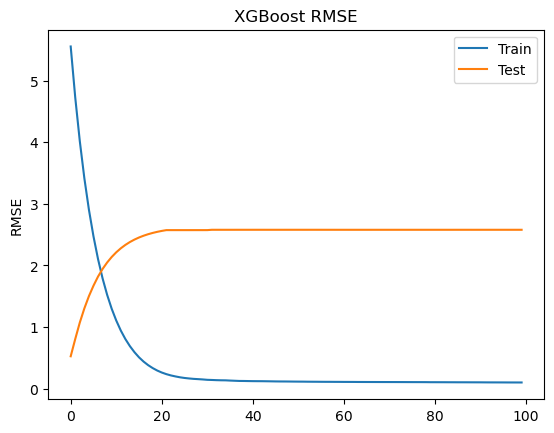

In [118]:
importlib.reload(plots)

plots.plot_xgboost_error(model_1m)

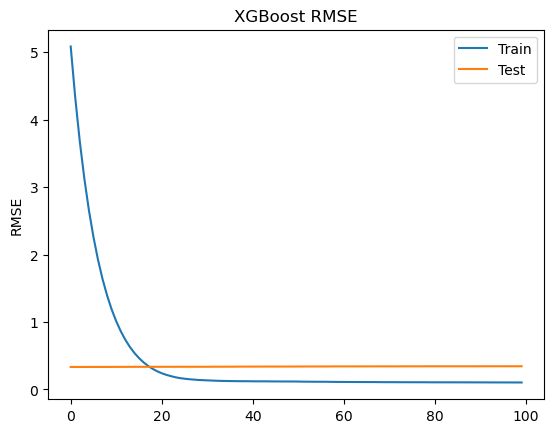

In [119]:
importlib.reload(plots)

plots.plot_xgboost_error(model_6m)

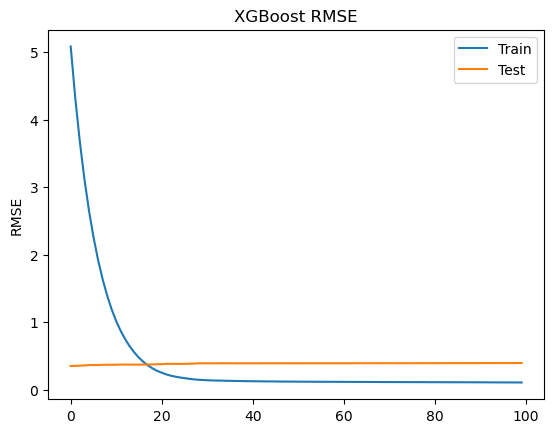

In [120]:
plots.plot_xgboost_error(model_12m)